In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler


In [2]:
data = pd.read_csv('Covid-19_IT.csv', usecols=[1,5,6])
data['dateRep'] = pd.to_datetime(data['dateRep'])
data.head()

,dateRep,cases,total
0,2019-12-31,0,0
1,2020-01-01,0,0
2,2020-01-02,0,0
3,2020-01-03,0,0
4,2020-01-04,0,0


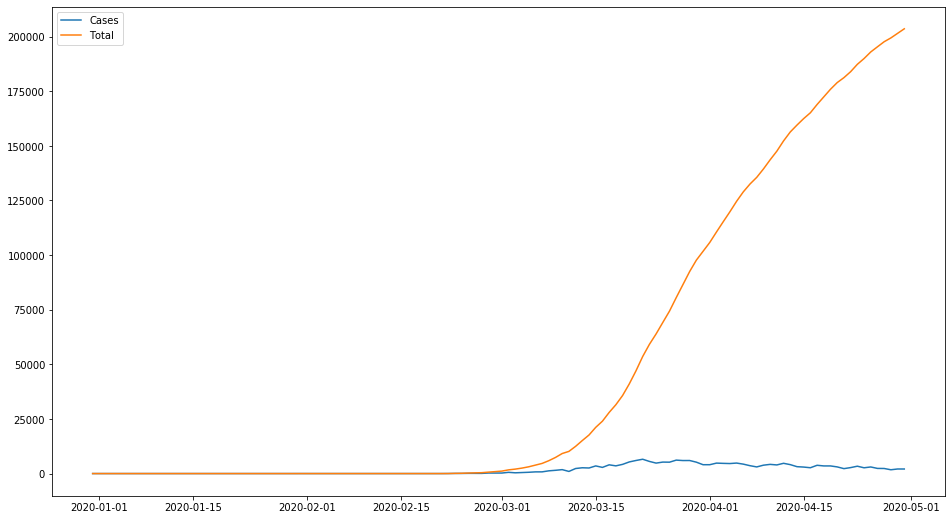

In [3]:
plt.figure(figsize=(16,9))
x = data['dateRep']
y = data['cases']
z = data['total']
plt.plot(x,y)
plt.plot(x,z)
plt.legend(['Cases', 'Total'])
plt.show()

In [4]:
def create_dataset(dataset, look_back=9):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back),0]
		dataX.append(a)
		dataY.append(dataset[i + look_back,0])
	return np.array(dataX), np.array(dataY)


In [5]:
from sklearn.preprocessing import MinMaxScaler
dataset = data['total'].values
dataset = dataset.astype('float32')
dataset = dataset.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
dataset.shape

(122, 1)

In [6]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [7]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX)

[[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.47354258e-05]
 [1.47354258e-05]
 [1.47354258e-05]
 [1.47354258e-05]
 [1.47354258e-05]
 [1.47354258e-05]
 [1.47354258e-05]
 [1.47354258e-05]
 [1.47354258e-05]
 [1.47354258e-05]
 [1.47354258e-05]
 [1.47354258e-05]
 [1.47354258e-05]
 [1.47354258e-05]
 [1.47354258e-05]
 [1.47354258e-05]
 [1.47354258e-05]
 [1.47354258e-05]
 [1.47354258e-05]
 [1.47354258e-05]
 [1.47354258e-05]
 [1.47354258e-05]
 [8.35007449e-05]
 [3.88032873e-04]
 [6.483587

In [8]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [9]:
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(LSTM(256, input_shape=(1, look_back), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=15, batch_size=2, verbose=2)

Epoch 1/15
42/42 - 0s - loss: 0.0040
Epoch 2/15
42/42 - 0s - loss: 0.0033
Epoch 3/15
42/42 - 0s - loss: 0.0032
Epoch 4/15
42/42 - 0s - loss: 0.0030
Epoch 5/15
42/42 - 0s - loss: 0.0027
Epoch 6/15
42/42 - 0s - loss: 0.0026
Epoch 7/15
42/42 - 0s - loss: 0.0022
Epoch 8/15
42/42 - 0s - loss: 0.0018
Epoch 9/15
42/42 - 0s - loss: 0.0016
Epoch 10/15
42/42 - 0s - loss: 0.0011
Epoch 11/15
42/42 - 0s - loss: 9.5088e-04
Epoch 12/15
42/42 - 0s - loss: 5.3592e-04
Epoch 13/15
42/42 - 0s - loss: 4.4559e-04
Epoch 14/15
42/42 - 0s - loss: 2.4313e-04
Epoch 15/15
42/42 - 0s - loss: 1.4157e-04


In [10]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = trainPredict.reshape(-1,1)
testPredict = testPredict.reshape(-1,1)
#trainPredict = scaler.inverse_transform(trainPredict)
#testPredict = scaler.inverse_transform(testPredict)
#dataset = scaler.inverse_transform(dataset)

In [11]:
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
dataset = scaler.inverse_transform(dataset)

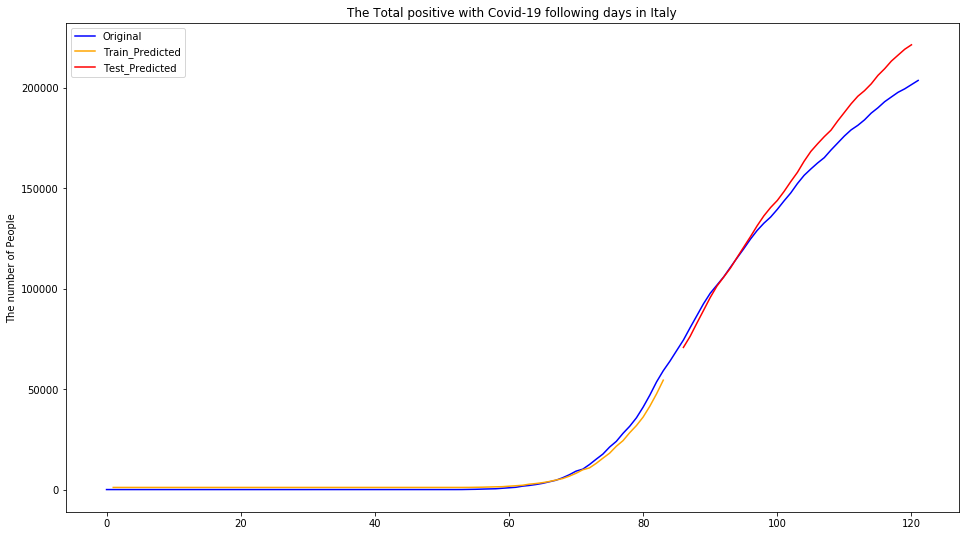

In [12]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(16,9))
plt.plot(dataset, color = 'blue')
plt.plot(trainPredictPlot, color = 'orange')
plt.plot(testPredictPlot, color = 'red')
plt.legend(['Original','Train_Predicted','Test_Predicted'])
plt.title('The Total positive with Covid-19 following days in Italy')
plt.ylabel('The number of People')
plt.show()

In [13]:
testY =scaler.inverse_transform(testY.reshape(-1,1))

In [14]:
testY

array([[ 74386.  ],
       [ 80539.  ],
       [ 86498.  ],
       [ 92472.  ],
       [ 97689.  ],
       [101739.  ],
       [105791.99],
       [110574.  ],
       [115242.01],
       [119827.  ],
       [124631.99],
       [128948.01],
       [132547.  ],
       [135586.  ],
       [139422.  ],
       [143626.  ],
       [147577.  ],
       [152271.  ],
       [156363.  ],
       [159516.  ],
       [162488.  ],
       [165155.  ],
       [168941.  ],
       [172434.  ],
       [175925.  ],
       [178972.  ],
       [181228.  ],
       [183957.  ],
       [187327.  ],
       [189973.  ],
       [192994.  ],
       [195351.  ],
       [197675.  ],
       [199414.  ],
       [201505.  ]], dtype=float32)

In [15]:
testPredict

array([[ 70724.87 ],
       [ 76217.22 ],
       [ 82755.26 ],
       [ 89130.54 ],
       [ 95576.8  ],
       [101251.41 ],
       [105689.58 ],
       [110160.22 ],
       [115471.63 ],
       [120692.305],
       [125849.05 ],
       [131291.55 ],
       [136214.56 ],
       [140345.23 ],
       [143850.39 ],
       [148298.45 ],
       [153203.47 ],
       [157842.12 ],
       [163389.3  ],
       [168257.53 ],
       [172029.34 ],
       [175601.16 ],
       [178820.03 ],
       [183411.66 ],
       [187671.05 ],
       [191950.2  ],
       [195703.27 ],
       [198492.94 ],
       [201879.89 ],
       [206081.17 ],
       [209394.4  ],
       [213192.81 ],
       [216167.64 ],
       [219110.73 ],
       [221319.42 ]], dtype=float32)

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
MAE = mean_absolute_error(testY, testPredict)
MSE = mean_squared_error(testY, testPredict)
RMSE = np.sqrt(MSE)
print(MAE)
print(MSE)
print(RMSE)

8137.6694
104644010.0
10229.565


In [17]:
from sklearn.preprocessing import MinMaxScaler
dataset = data['total'].values
dataset = dataset.astype('float32')
dataset = dataset.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
dataset.shape

(122, 1)

In [18]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [19]:
look_back = 7
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [20]:
ANN_model = Sequential()
ANN_model.add(Dense(512, input_shape=(1, look_back), activation='relu'))
ANN_model.add(Dense(1))
ANN_model.compile(loss='mean_squared_error', optimizer='adam')
ANN_model.fit(trainX, trainY, epochs=1, batch_size=2, verbose=2)

39/39 - 0s - loss: 0.0015


In [21]:
trainPredict = ANN_model.predict(trainX)
testPredict = ANN_model.predict(testX)
trainPredict = trainPredict.reshape(-1,1)
testPredict = testPredict.reshape(-1,1)

In [22]:
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
dataset = scaler.inverse_transform(dataset)

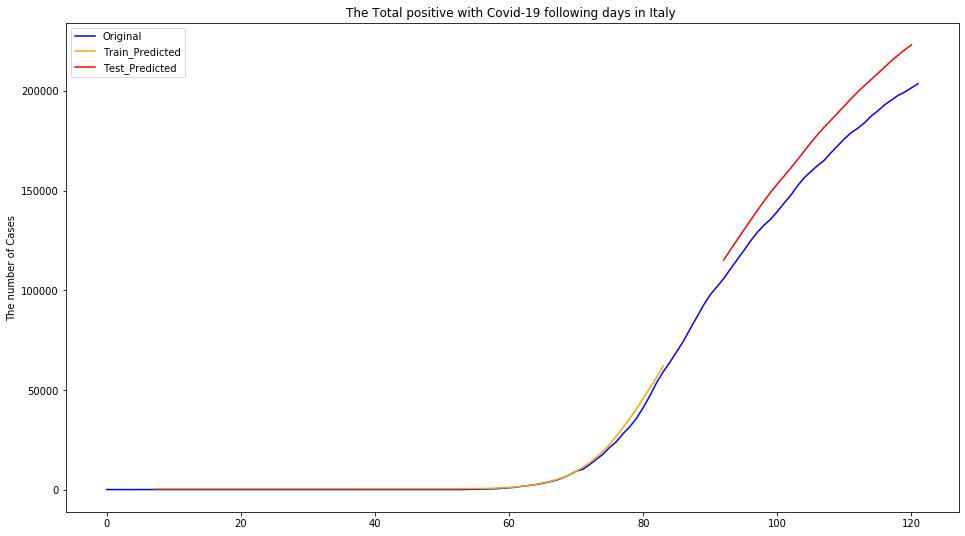

In [23]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(16,9))
plt.plot(dataset, color = 'blue')
plt.plot(trainPredictPlot, color = 'orange')
plt.plot(testPredictPlot, color = 'red')
plt.legend(['Original','Train_Predicted','Test_Predicted'])
plt.title('The Total positive with Covid-19 following days in Italy ')
plt.ylabel('The number of Cases')
plt.show()

In [24]:
testY =scaler.inverse_transform(testY.reshape(-1,1))

In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
MAE = mean_absolute_error(testY, testPredict)
MSE = mean_squared_error(testY, testPredict)
RMSE = np.sqrt(MSE)
print(MAE)
print(MSE)
print(RMSE)

15253.962
245657220.0
15673.456
